In [ ]:
# Change 1234 

In [1]:
from dask.distributed import Client, LocalCluster

# Connect to an existing LocalCluster if available
# The default port is 8786
try:
    # This creates a new Client connection to an existing Dask scheduler if one exists.
    # There is no practical way to get the LocalCluster object from the existing scheduler,
    # although the scheduler details can be accessed with `client.scheduler`.
    # The LocalCluster object is only available from the notebook that created it.
    # Restart the kernel or `client.close();cluster.close()` in each notebook that
    # created one to remove existing LocalClusters.
    client = Client(f'localhost:8786', timeout='2s')
    cluster = client.cluster  # None
except:
    cluster = LocalCluster(scheduler_port=8786)
    client = Client(cluster)

display(cluster if cluster else client)

<Client: 'tcp://127.0.0.1:8786' processes=8 threads=32, memory=28.00 GiB>

In [2]:
# Initiliaze the Gateway client
from dask.distributed import Client
from dask_gateway import Gateway

gateway = Gateway()
gateway.cluster_options()

In [3]:
clusters = gateway.list_clusters()
if not clusters:
    print('Creating new cluster. Please wait for this to finish.')
    cluster = gateway.new_cluster()
else:
    print(f'An existing cluster was found. Connecting to: {clusters[0].name}')
    cluster=gateway.connect(clusters[0].name)
display(cluster)

An existing cluster was found. Connecting to: easihub.bb5d415c16cc4f56842a95cfb3eb6b3b


In [4]:
min_number_of_workers = 1
max_number_of_workers = 4

# Static scaling
cluster.scale(min_number_of_workers)

# Adaptive scaling
cluster.adapt(minimum=min_number_of_workers, maximum=max_number_of_workers)

In [5]:
client = cluster.get_client()
client.wait_for_workers(n_workers=min_number_of_workers)
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.csiro.easi-eo.solutions/services/dask-gateway/clusters/easihub.bb5d415c16cc4f56842a95cfb3eb6b3b/status,


In [6]:
# import pandas
import pandas as pd

# read the dataset
data = pd.read_csv("metdom_sed.csv") 

data

,ID,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
0,SED_S19S.0001_D_Field,1,1,1,9,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,1
1,SED_S19S.0001_M_Field,1,2,1,9,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,1
2,SED_S19S.0001_U_Field,1,3,1,9,1,1,1,1,1,...,0,1,1,0,1,0,1,0,0,1
3,SED_S19S.0003_D_Field,1,1,1,7,1,0,2,1,1,...,0,0,0,1,0,0,0,0,0,0
4,SED_S19S.0003_M_Field,1,2,1,7,1,0,2,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,SED_S19S.0100_D_Field,1,1,1,2,2,2,1,1,1,...,1,1,1,0,1,0,0,1,1,0
237,SED_S19S.0100_M_Field,1,2,1,2,2,2,1,1,1,...,0,1,1,0,1,1,0,1,0,0
238,SED_S19S.0100_U_Field,1,3,1,2,2,2,1,1,1,...,0,1,1,0,1,0,0,1,0,0
239,SW_S19S.0003_U_1,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# apply standard scalar to interval data to standardise them
# because the interval data was measured in different units (eg degC, m, mg/L, etc)
# leave all nominal data (prev converted from categorical data) as it is.
# leave binaries as it is because these are the targets

import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaled_features = data.copy()

col_names = [
    "Distance_DS.and.MS_meters",
    "Distance_MS.and.US_meters",
    "Primary.Sources.Flow.Variation",
    "Water.Column.Height_cm",
    "Approx.Distance.From.Gauge_meters",
    "resprate_mg.L.h",
    "resp.inc.time.min",
    "NPOC_mg.L.asC",
    "del2H_permil",
    "del18O_permil",
    "Cl_mgL",
    "SO4_mgL",
    "NO3_mgL",
    "NO2_mgL",
    "F_mgL",
    "pH",
    "DO_perc.sat",
    "DO_mg.per.L",
]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

# https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

In [8]:
scaled_features[col_names] = features
print(scaled_features)

                        ID  sample.type  location.id  sampling.type  \
0    SED_S19S.0001_D_Field            1            1              1   
1    SED_S19S.0001_M_Field            1            2              1   
2    SED_S19S.0001_U_Field            1            3              1   
3    SED_S19S.0003_D_Field            1            1              1   
4    SED_S19S.0003_M_Field            1            2              1   
..                     ...          ...          ...            ...   
236  SED_S19S.0100_D_Field            1            1              1   
237  SED_S19S.0100_M_Field            1            2              1   
238  SED_S19S.0100_U_Field            1            3              1   
239       SW_S19S.0003_U_1            2            3              2   
240       SW_S19S.0003_U_2            2            3              2   

     Stream_Order  Country  General_Vegetation  Hydrogeomorphology  \
0               9        1                   1                   1   
1      

In [9]:
scaled_features

,ID,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
0,SED_S19S.0001_D_Field,1,1,1,9,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,1
1,SED_S19S.0001_M_Field,1,2,1,9,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,1
2,SED_S19S.0001_U_Field,1,3,1,9,1,1,1,1,1,...,0,1,1,0,1,0,1,0,0,1
3,SED_S19S.0003_D_Field,1,1,1,7,1,0,2,1,1,...,0,0,0,1,0,0,0,0,0,0
4,SED_S19S.0003_M_Field,1,2,1,7,1,0,2,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,SED_S19S.0100_D_Field,1,1,1,2,2,2,1,1,1,...,1,1,1,0,1,0,0,1,1,0
237,SED_S19S.0100_M_Field,1,2,1,2,2,2,1,1,1,...,0,1,1,0,1,1,0,1,0,0
238,SED_S19S.0100_U_Field,1,3,1,2,2,2,1,1,1,...,0,1,1,0,1,0,0,1,0,0
239,SW_S19S.0003_U_1,2,3,2,7,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# export the scaled data for future use

scaled_features.to_csv("metdom_sed_scaled.csv")

In [11]:
"deactivate once done - double ## hash key"
# split train test data 80/20 ratio
from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_features, test_size=0.20, random_state=42)
train

,ID,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
115,SED_S19S.0050_M_Field,1,2,1,0,2,9,1,1,3,...,0,0,0,0,0,0,0,0,1,0
205,SED_S19S.0084_U_Field,1,3,1,1,2,8,2,2,1,...,0,0,0,0,0,0,0,0,0,0
216,SED_S19S.0090_M_Field,1,2,1,1,2,8,2,1,2,...,0,0,0,0,0,0,0,0,0,1
132,SED_S19S.0056_M_Field,1,2,1,0,5,2,2,1,1,...,0,0,1,0,1,0,0,0,0,1
84,SED_S19S.0036_M_Field,1,2,1,8,2,8,2,1,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,SED_S19S.0044_M_Field,1,2,1,3,2,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14,SED_S19S.0010_M_Field,1,2,1,7,2,5,1,1,1,...,0,0,0,0,0,1,0,0,1,0
92,SED_S19S.0039_M_Field,1,2,1,3,2,6,1,1,1,...,0,0,1,0,0,0,1,0,1,0
179,SED_S19S.0073_U_Field,1,3,1,1,2,3,1,1,1,...,0,1,0,0,0,0,0,0,0,1


In [12]:
"deactivate once done - double ## hash key"
# export the training and test data in csv

train.to_csv("train_metdom_sed.csv", index=False)
test.to_csv("test_metdom_sed.csv", index=False)

In [13]:
X_train = train[
    [
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "DO_perc.sat",
        "DO_mg.per.L",
    ]
].astype(float)
X_train

,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,Sediment_Bedrock,...,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,pH,DO_perc.sat,DO_mg.per.L
115,1.0,2.0,1.0,0.0,2.0,9.0,1.0,1.0,3.0,3.0,...,-2.067614,-1.847279,-0.190694,-0.333088,-0.389740,-0.188485,-0.504851,-0.091478,0.0,0.0
205,1.0,3.0,1.0,1.0,2.0,8.0,2.0,2.0,1.0,3.0,...,-0.117632,-0.244059,-0.190651,-0.374089,-0.389740,-0.188485,-0.504851,-0.091478,0.0,0.0
216,1.0,2.0,1.0,1.0,2.0,8.0,2.0,1.0,2.0,1.0,...,1.225995,1.495028,-0.147570,0.167316,2.001912,-0.188485,-0.606496,-0.091478,0.0,0.0
132,1.0,2.0,1.0,0.0,5.0,2.0,2.0,1.0,1.0,1.0,...,-0.129116,0.020880,-0.153501,-0.034682,-0.094331,-0.024101,0.054197,-0.091478,0.0,0.0
84,1.0,2.0,1.0,8.0,2.0,8.0,2.0,1.0,1.0,3.0,...,-1.812669,-1.602720,-0.186733,-0.224491,-0.308791,-0.188485,-0.149093,-0.091478,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,2.0,1.0,3.0,2.0,11.0,1.0,1.0,1.0,2.0,...,0.722996,0.700211,-0.175449,-0.342112,-0.360304,-0.188485,-0.454029,-0.091478,0.0,0.0
14,1.0,2.0,1.0,7.0,2.0,5.0,1.0,1.0,1.0,2.0,...,0.895256,0.832680,-0.175577,-0.201695,-0.312997,-0.188485,-0.149093,-0.091478,0.0,0.0
92,1.0,2.0,1.0,3.0,2.0,6.0,1.0,1.0,1.0,3.0,...,0.775822,0.679831,-0.170802,-0.205969,0.419743,0.195078,0.105019,-0.091478,0.0,0.0
179,1.0,3.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,...,0.233778,0.275629,0.012656,-0.369499,-0.344535,-0.188485,-0.555674,-0.091478,0.0,0.0


In [14]:
# drop target columns

y_train = train.drop(
    axis=0,
    columns=[
        "ID",
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "Temp_degC",
        "DO_perc.sat",
        "DO_mg.per.L",
    ],
).astype(int)

y_train

,C10H10O5,C10H10O5N2,C10H10O5S,C10H10O6,C10H10O6N2,C10H10O6S,C10H10O7,C10H10O7S,C10H10O8,C10H10O8S,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
205,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
216,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
132,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
84,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
92,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
179,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [15]:
y_train.dtypes

C10H10O5        int64
C10H10O5N2      int64
C10H10O5S       int64
C10H10O6        int64
C10H10O6N2      int64
                ...  
C9H21O8S2P      int64
C9H22O7N4       int64
C9H22O9N4S      int64
C9H24O7N4       int64
C9H5O10N2S2P    int64
Length: 6879, dtype: object

In [16]:
!pip install scikit-multilearn

  Using cached scikit_multilearn-0.2.0-py3-none-any.whl (89 kB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/env/lib/python3.8/site-packages/skmultilearn'
Check the permissions.



In [17]:
# from skmultilearn.problem_transform import BinaryRelevance
import time
import joblib

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = RandomForestClassifier()

"""classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True] 
)"""

# running computation with dask https://www.codegrepper.com/code-examples/python/dask-ml+random+forest
with joblib.parallel_backend('dask'):
    rf_fitted = classifier.fit(X_train, y_train)
    
# scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)


print("training time taken: ", round(time.time() - start, 0), "seconds")
#print("CV accuracy scores: %s" % scores)
#print("CV accuracy:%.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

training time taken:  23.0 seconds


In [18]:
# prepare the test set for model evalution

In [19]:
X_test = test[
    [
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "DO_perc.sat",
        "DO_mg.per.L",
    ]
].astype(float)
X_test

,sample.type,location.id,sampling.type,Stream_Order,Country,General_Vegetation,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,Sediment_Bedrock,...,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,pH,DO_perc.sat,DO_mg.per.L
24,1.0,3.0,1.0,1.0,2.0,8.0,1.0,2.0,1.0,3.0,...,0.112048,-0.030070,-0.185405,-0.366016,-0.300381,-0.188485,-0.403206,-0.091478,0.0,0.0
6,1.0,2.0,1.0,6.0,1.0,1.0,2.0,1.0,1.0,3.0,...,-1.766733,-1.584039,-0.187589,-0.312825,-0.389740,-0.188485,-0.352384,-0.091478,0.0,0.0
222,1.0,3.0,1.0,0.0,7.0,3.0,2.0,1.0,1.0,2.0,...,1.225995,1.495028,-0.123396,0.298710,5.237739,6.551270,0.155842,-0.091478,0.0,0.0
208,1.0,1.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,3.0,...,1.225995,1.495028,-0.168383,0.851355,-0.389740,-0.188485,-0.098271,-0.091478,0.0,0.0
236,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,...,0.208513,0.216188,-0.191036,0.131855,-0.389740,-0.188485,-0.250738,-0.091478,0.0,0.0
173,1.0,2.0,1.0,1.0,2.0,10.0,1.0,2.0,3.0,3.0,...,-1.585286,-1.511011,-0.190523,-0.357626,-0.389740,-0.188485,-0.250738,-0.091478,0.0,0.0
197,1.0,3.0,1.0,4.0,2.0,8.0,2.0,2.0,1.0,3.0,...,0.419819,0.374132,0.006039,-0.231931,-0.092229,-0.188485,-0.250738,-0.091478,0.0,0.0
220,1.0,1.0,1.0,0.0,7.0,3.0,2.0,1.0,1.0,2.0,...,1.225995,1.495028,-0.123396,0.298710,5.237739,6.551270,0.155842,-0.091478,0.0,0.0
9,1.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,...,1.225995,1.495028,0.475068,0.113334,0.273615,-0.188485,-0.606496,-0.091478,0.0,0.0
113,1.0,3.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0,...,0.920521,0.776636,-0.177290,-0.339262,-0.332971,-0.188485,-0.403206,-0.091478,0.0,0.0


In [20]:
# drop target columns

y_test = test.drop(
    axis=0,
    columns=[
        "ID",
        "sample.type",
        "location.id",
        "sampling.type",
        "Stream_Order",
        "Country",
        "General_Vegetation",
        "Hydrogeomorphology",
        "River_Gradient",
        "Intermittent_or_Perennial",
        "Sediment_Bedrock",
        "Distance_DS.and.MS_meters",
        "Distance_MS.and.US_meters",
        "Primary.Sources.Flow.Variation",
        "Algal.Mat.Coverage",
        "Depositional.Type",
        "Macrophyte.Coverage",
        "Sunlight.Access_Perc.Canopy.Cover",
        "Water.Column.Height_cm",
        "Approx.Distance.From.Gauge_meters",
        "US.or.DS.of.Gauge",
        "Precipitation.Within.Week",
        "Number.Days.Since.Precip",
        "Dam.Upstream.Site",
        "Contamination.Source.Upstream",
        "Contamination.Source",
        "resprate_mg.L.h",
        "resp.inc.time.min",
        "NPOC_mg.L.asC",
        "del2H_permil",
        "del18O_permil",
        "Cl_mgL",
        "SO4_mgL",
        "NO3_mgL",
        "NO2_mgL",
        "F_mgL",
        "pH",
        "Temp_degC",
        "DO_perc.sat",
        "DO_mg.per.L",
    ],
).astype(int)

y_test

,C10H10O5,C10H10O5N2,C10H10O5S,C10H10O6,C10H10O6N2,C10H10O6S,C10H10O7,C10H10O7S,C10H10O8,C10H10O8S,...,C9H18O3NS2P,C9H18O5,C9H19O5NS,C9H19O8P,C9H20O6N4S,C9H21O8S2P,C9H22O7N4,C9H22O9N4S,C9H24O7N4,C9H5O10N2S2P
24,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,1,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,1
208,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
236,1,0,0,1,0,0,1,0,1,0,...,1,1,1,0,1,0,0,1,1,0
173,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
197,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,1
220,1,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,1
9,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
113,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0,1


In [21]:
test_pred = classifier.predict(X_test)

test_pred

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [22]:
imp1 = pd.Series(rf_fitted.feature_importances_, index=X_train.columns).nlargest(35)

imp1

NPOC_mg.L.asC                        0.115699
Water.Column.Height_cm               0.066729
resp.inc.time.min                    0.058673
resprate_mg.L.h                      0.051631
Cl_mgL                               0.043960
SO4_mgL                              0.043029
del18O_permil                        0.041576
Approx.Distance.From.Gauge_meters    0.040603
location.id                          0.040174
F_mgL                                0.039387
del2H_permil                         0.037426
Distance_DS.and.MS_meters            0.034601
General_Vegetation                   0.034534
Distance_MS.and.US_meters            0.033346
NO3_mgL                              0.029871
Stream_Order                         0.029595
Depositional.Type                    0.028876
Primary.Sources.Flow.Variation       0.027583
Sunlight.Access_Perc.Canopy.Cover    0.027407
Number.Days.Since.Precip             0.022383
Contamination.Source                 0.018908
Sediment_Bedrock                  

In [23]:
imp = pd.Series(rf_fitted.feature_importances_, index=X_train.columns).nlargest(25)

imp

NPOC_mg.L.asC                        0.115699
Water.Column.Height_cm               0.066729
resp.inc.time.min                    0.058673
resprate_mg.L.h                      0.051631
Cl_mgL                               0.043960
SO4_mgL                              0.043029
del18O_permil                        0.041576
Approx.Distance.From.Gauge_meters    0.040603
location.id                          0.040174
F_mgL                                0.039387
del2H_permil                         0.037426
Distance_DS.and.MS_meters            0.034601
General_Vegetation                   0.034534
Distance_MS.and.US_meters            0.033346
NO3_mgL                              0.029871
Stream_Order                         0.029595
Depositional.Type                    0.028876
Primary.Sources.Flow.Variation       0.027583
Sunlight.Access_Perc.Canopy.Cover    0.027407
Number.Days.Since.Precip             0.022383
Contamination.Source                 0.018908
Sediment_Bedrock                  

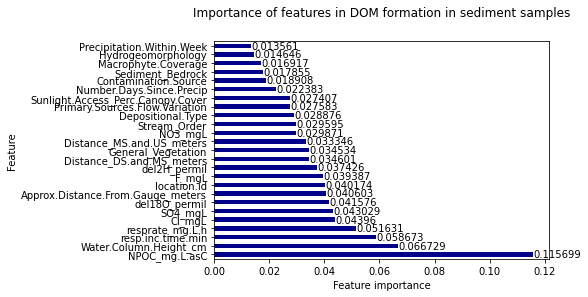

<Figure size 432x288 with 0 Axes>

distributed.client - ERROR - Failed to reconnect to scheduler after 2.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [24]:
import matplotlib.pyplot as plt
import numpy as np

FI = (
    pd.Series(rf_fitted.feature_importances_, index=X_train.columns)
    .nlargest(25)
    .plot(kind="barh", color="darkblue")
)

plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Importance of features in DOM formation in sediment samples", pad=25)

# bar labelling guide https://stackoverflow.com/questions/52182746/matplotlib-horizontal-bar-plot-add-values-to-bars
for i, v in enumerate(imp):
    plt.text(v + 0.0001, i, str(round(v, 6)), color="black", va="center")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("feat_sed.pdf", dpi=500, bbox_inches='tight')